In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

import seaborn as sns
sns.set(style = "white",color_codes = True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle


print('done')

done


In [2]:
data = pd.read_csv(r'C:\Users\Pratik\Desktop\class DS\python\Python from simpli learn\Data sets\Datasets\Demo Datasets\Lesson 4\Advertising.csv',index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.columns = ['TV','Radio','Newspaper','Sales']

In [5]:
data.shape

(200, 4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


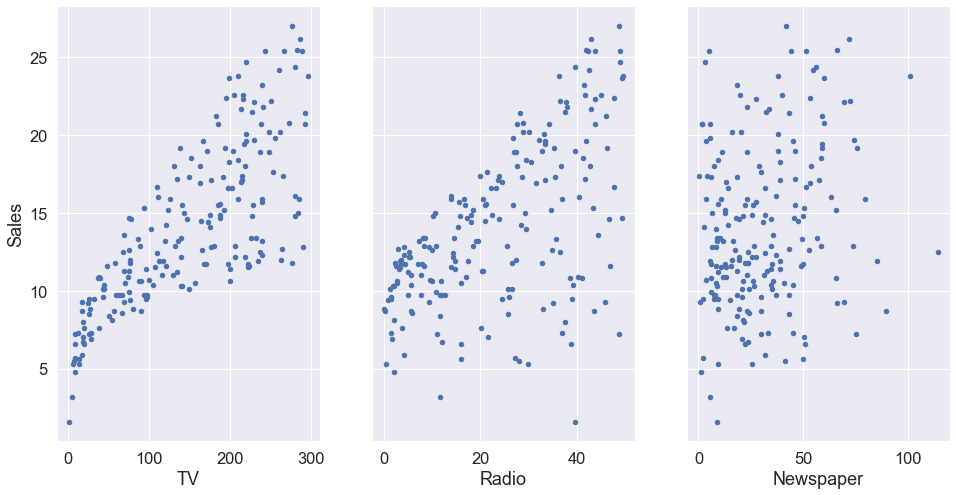

In [6]:
fig,axs = plt.subplots(1,3,sharey=True)
data.plot(kind = "scatter", x = 'TV', y = "Sales",ax = axs[0],figsize = (16,8))
data.plot(kind = "scatter", x = 'Radio', y = "Sales",ax = axs[1]) 
data.plot(kind = "scatter", x = 'Newspaper', y = "Sales",ax = axs[2])

In [7]:
feature_cols = ['TV']
x =  data[feature_cols]
y = data.Sales

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [9]:
print(lr.intercept_)
print(lr.coef_)

7.032593549127693
[0.04753664]


In [10]:
7.032593549+0.04753664*50

9.409425549

In [20]:
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [22]:
lr.predict(x_new)

array([9.40942557])

In [24]:
x_new = pd.DataFrame({'TV': [data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [25]:
preds = lr.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


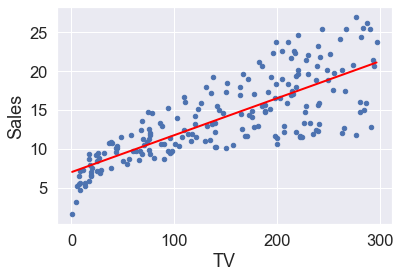

In [27]:
data.plot(kind = 'scatter',x='TV',y="Sales")
plt.plot(x_new,preds,c="red",linewidth=2)

In [29]:
import statsmodels.formula.api as smf
lr = smf.ols(formula = 'Sales ~ TV', data = data).fit()

In [30]:
lr.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
lr.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [32]:
lr.rsquared

0.611875050850071

In [34]:
feature_cols = ['TV', "Radio", 'Newspaper']
x = data[feature_cols]
y = data.Sales

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [35]:
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
print(lr.intercept_)
print(lr.coef_)

2.708949092515912
[0.04405928 0.1992875  0.00688245]


In [39]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
print(lr.intercept_)
print(lr.coef_)

pred = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test,pred)))

2.708949092515912
[0.04405928 0.1992875  0.00688245]
1.9485372043446383


In [44]:
lr= smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = data ).fit()
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        15:01:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#null hypothess is failed for tv and radio 
#only keep feature into model if it has small p values and also check wheather the r2 value is increasing 

In [46]:
lr= smf.ols(formula = 'Sales ~ TV+Radio', data = data ).fit()
lr.rsquared

0.8971942610828956

In [47]:
lr= smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = data ).fit()
lr.rsquared

0.8972106381789522

In [48]:
#checking r squared by adding one numeric column to data
#create the new column

In [49]:
'''
import numpy as np
np.random.seed(12345)

nums = np.random.rand(len(data))
mask_large = nums > 0.5
data['size'] = 'small'
data.loc[mask_large,'size'] = "large"
data.head()
'''

,TV,Radio,Newspaper,Sales,size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large
